{'K2': 28211.838029234856, 'dil1': 31572.749340571729, 'dil2': -5511.9290949967763, 'K1': 213446.25064807505, 'dH2': -5838.5754508913369, 'dH1': -4371.8605101132971, 'fx2': 1.6084561364476802, 'fx1': 1.5500857368328929}


/home/harmsm/Desktop/pytc/pytc/models.py:97: RuntimeWarning: invalid value encountered in sqrt
  ST = (b - np.sqrt((b)**2 - 4*S_conc_corr*self._T_conc))/2


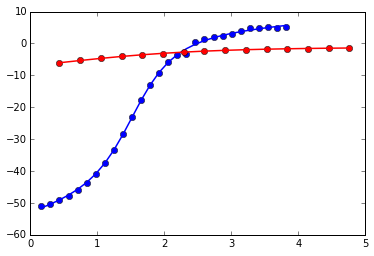

In [13]:
# Imports
import pytc
%matplotlib inline

# Set up the global fit with parameter guesses
fitter = pytc.GlobalFit({"K1":1e6,"dH1":-2000,"fx1":1.0,"dil1":0.0,
                         "K2":1e6,"dH2":-2000,"fx2":1.0,"dil2":0.0})

# Load in an experiment
e1 = pytc.ITCExperiment("test-data/hA5A5conTESCaTCEP.DH",pytc.models.SingleSite)

# Associate the global K1 parameter with the local KA parameter, etc.
fitter.add_experiment(e1,{"K1":"K",
                          "dH1":"dH",
                          "fx1":"fx_competent",
                          "dil1":"dilution_heat"})

# Load in another experiment
e2 = pytc.ITCExperiment("test-data/hA5NCX1TESCaTCEP.DH",pytc.models.SingleSite)
fitter.add_experiment(e2,{"K2":"K",
                          "dH2":"dH",
                          "fx2":"fx_competent",
                          "dil2":"dilution_heat"})

# Do the global fit
fitter.fit()

# Plot the fit
fitter.plot()

# Print out the final fit parameters
print(fitter.fit_param)